In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Population
data ref: Ravenna   
data source: Istat

Indicator: the aim of this indicator is to show the general population indicators in each district.
Limitations: fake data for population; outdated data (families: Istat 2003-2013).

## General indicators

In [2]:
pop = pd.read_csv( './data/pop.csv' )
print(pop.head(3))

   age gender nationality
0    0      F  BANGLADESH
1    0      M  BANGLADESH
2    0      F  BANGLADESH


      gender
F  52.226319
M  47.773681


Text(0.5, 1.0, 'Genders')

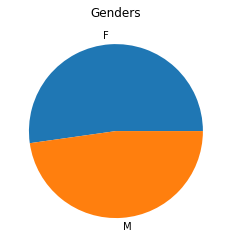

In [3]:
gender = pd.DataFrame(pop['gender'].value_counts( normalize = True ) * 100) # relative frequency of unique values * 100
# print(type(gender))
print(gender)
gender.plot.pie( y = 'gender', ylabel = '', legend = False )
plt.title('Genders')

           percent
country           
ALBANIA   2.537725
ITALY    81.637902
NIGERIA   2.165897


<AxesSubplot:>

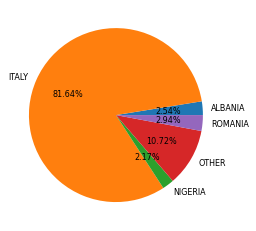

In [4]:
nationality = pd.DataFrame( pop['nationality'].value_counts( normalize = True ) * 100 )
nationality = nationality.rename( columns = {'nationality' : 'percent'} )
nationality['country'] = nationality.index.values
nationality.loc[ nationality.percent < 1, 'country' ] = 'OTHER' # group all nationalities below 1% to avoid unreadable pie
nationality = nationality.groupby('country').sum()
print(nationality.head(3))
nationality.plot.pie( y = 'percent', ylabel = '', legend = False, fontsize = 8, autopct="%.2f%%" )

        age
0  0.080563
1  0.923372
2  0.833514


<AxesSubplot:>

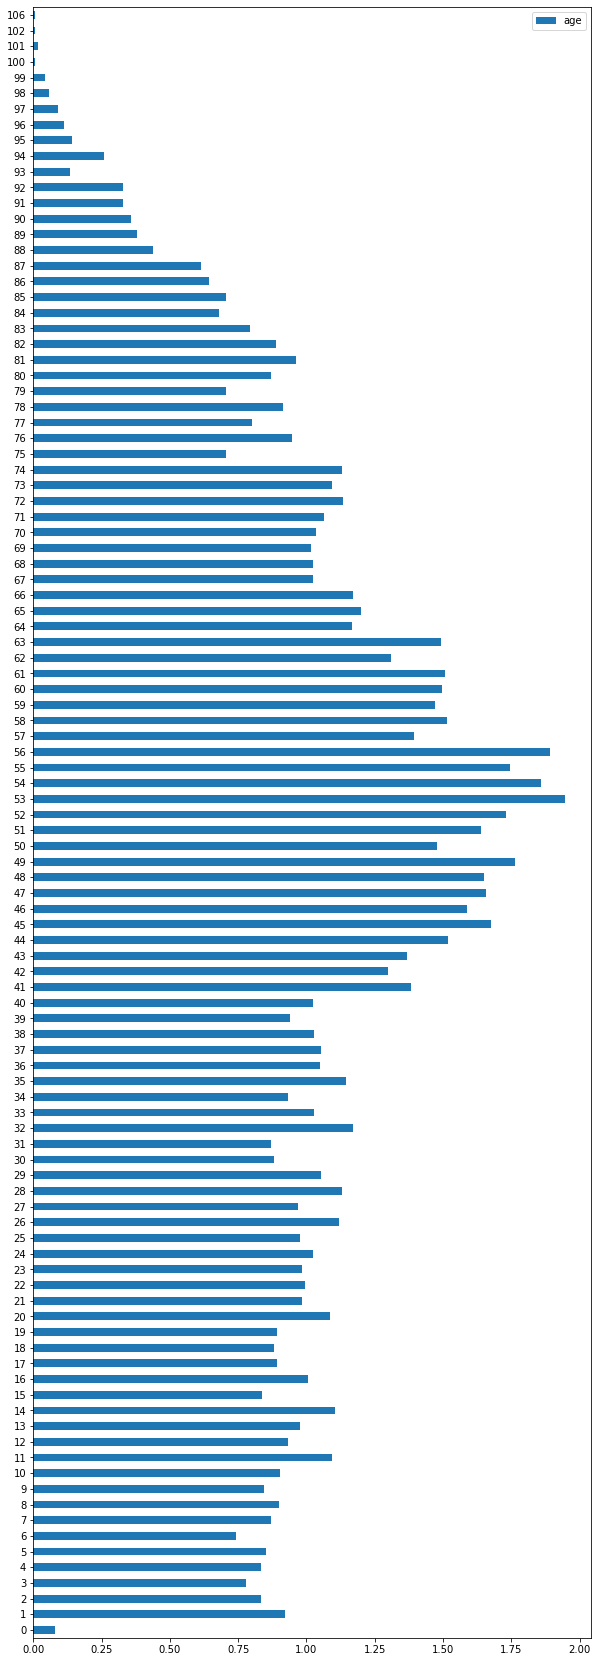

In [5]:
age = pd.DataFrame( pop['age'].value_counts( normalize = True ) * 100 )
age = age.sort_index()
print(age.head(3))
age.plot.barh(figsize = (10, 30))

## Families

                                            geometry    frazione
0  POLYGON ((284232.269 4930649.527, 284235.500 4...    DEL MARE
1  POLYGON ((275721.083 4917396.486, 275668.926 4...  RONCALCECI
2  POLYGON ((271213.347 4927446.004, 271222.387 4...  PIANGIPANE


<AxesSubplot:>

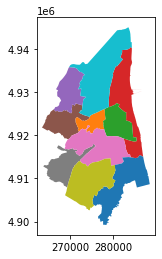

In [6]:
areas = gpd.read_file( './data/aree.geojson' )
areas = areas[["geometry", "NOME_AT"]] # shows epsg:3004, but it's wrong
areas = areas.rename( columns = { "NOME_AT" : "frazione" } )
areas = areas.set_crs( "epsg:4326", allow_override = True )
areas = areas.to_crs( epsg = 32633 ) #utm
print(areas.head(3))
areas.plot( column = "frazione" )

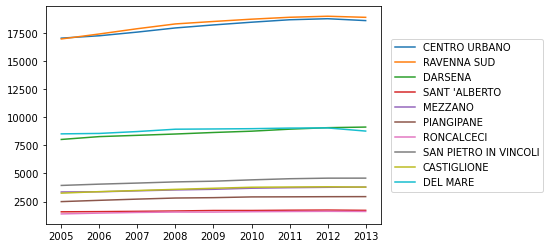

In [7]:
families = pd.read_csv( './data/fam.csv' )
families = families.rename( columns = { 'AREA TERRITORIALE' : 'frazione'} )
families_line = families.set_index('frazione').transpose()
# print(families_line.head(2))
families_line.plot.line()
plt.legend(bbox_to_anchor = (1.5, 0.5), loc = 'center right' )

<AxesSubplot:>

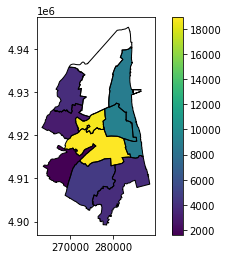

In [8]:
families_areas = pd.merge( areas, families, on = 'frazione' )
base = families_areas.plot( column = '2013', legend = True )
areas.plot( ax = base, color = 'none', edgecolor = 'black' )